In [35]:
import pickle
import pandas as pd
import seaborn as sns

In [36]:
with open('results_log.pkl', 'rb') as handle:
    res = pickle.load(handle)

In [37]:
etas = [x[-1] for x in res.evals.conf]

In [44]:
tab = res.evals
tab['s'] = 0
tab.reset_index(drop=True, inplace=True)
tab['s'] = (tab.index)%8

In [39]:
def mapping(x):
    if x>3:
        return 3
    elif x in [2,3]:
        return 2
    else:
        return x
    
def mapping2(x):
    if x==0:
        return '1st'
    elif x==1:
        return '2nd'
    elif x==2:
        return '3rd'
    else:
        return '4th'

In [46]:
tab.s = tab.s.apply(lambda x: mapping(x))
tab.s = tab.s.apply(lambda x: mapping2(x))
tab['eta'] = etas
tab = tab[tab.L>0.6]

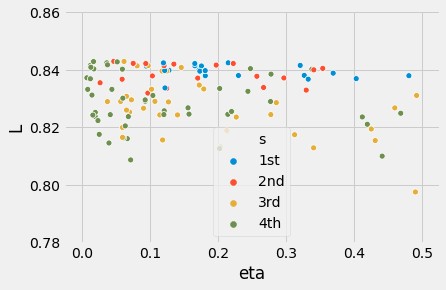

In [63]:
sns.scatterplot(tab.eta, tab.L, hue=tab.s)

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib import style

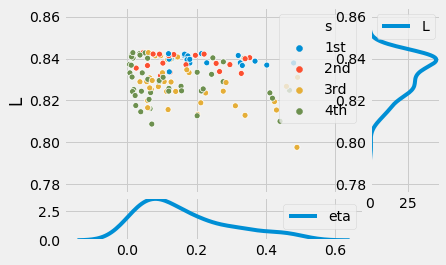

In [70]:

style.use('fivethirtyeight')

fig = plt.figure()
ax1 = plt.subplot2grid((10,10), (0,0), rowspan=8, colspan=8)
#plt.title('stock')
#plt.ylabel('H-L')
sns.scatterplot(tab.eta, tab.L, hue=tab.s)
ax2 = plt.subplot2grid((10,10), (0,8), rowspan=8, colspan=2, sharey=ax1)
sns.kdeplot(tab.L, vertical=True)
#plt.ylabel('Price')
ax3 = plt.subplot2grid((10,10), (8,0), rowspan=2, colspan=8, sharex=ax1)
sns.kdeplot(tab.eta)
#plt.ylabel('MAvgs')

In [3]:
losses = res.evals.L

In [4]:
import seaborn as sb

[(0.75, 0.85)]

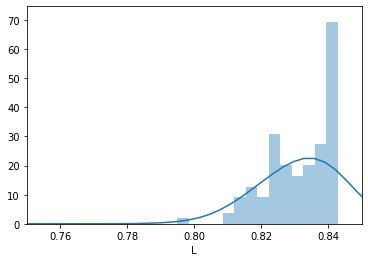

In [48]:
ax = sb.distplot(losses, bins=100)
ax.set(xlim=(0.75, 0.85))

In [6]:
etas = [x[-1] for x in res.evals.conf]

In [7]:
etas

[0.12733170916093925,
 0.09624379988758094,
 0.22629371997436037,
 0.06939261720030025,
 0.0016130780417726149,
 0.009962482004251469,
 0.03591783724463581,
 0.009335447375733247,
 0.09442111002153232,
 0.04616722203917984,
 0.21237442783998095,
 0.11379543587704126,
 0.05122375339720821,
 0.15534083415493963,
 0.46817524847620184,
 0.00781148047442078,
 0.16541631681302213,
 0.29631341193267,
 0.2771237089600335,
 0.10666765531230299,
 0.15681385190345346,
 0.03688548606923666,
 0.0063196931828614,
 0.00305019770201453,
 0.32034279899078083,
 0.026005908981476682,
 0.0648705075421421,
 0.4248732584430128,
 0.011705420454815593,
 0.0044016082434999455,
 0.010297651062329343,
 0.011405891074098784,
 0.326291741596148,
 0.35349481768964364,
 0.059029575536498666,
 0.14538779798324517,
 0.0027368896540110182,
 0.016821222708855568,
 0.2434418031464571,
 0.007561802655207266,
 0.1807689900917018,
 0.12398977744576935,
 0.011638554818258881,
 0.05630420084649984,
 0.06306963258757903,
 0.00

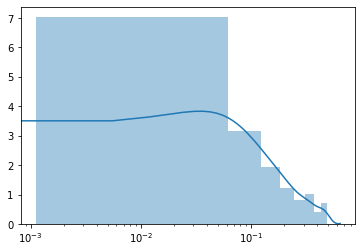

In [54]:
ax = sb.distplot(etas)
ax.set_xscale('log')

In [36]:
losses2 = res.evals[res.evals.etas < 0.01].L

/home/dine/Documents/environments/ML1/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/dine/Documents/environments/ML1/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


[(0.75, 0.85)]

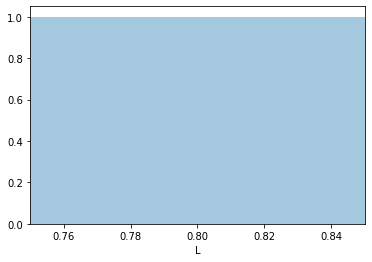

In [37]:
ax = sb.distplot(losses2)
ax.set(xlim=(0.75, 0.85))

In [10]:
res.evals.L[0].describe()

count    80.000000
mean      0.791546
std       0.111259
min       0.500000
25%       0.823652
50%       0.834624
75%       0.839885
max       0.842886
Name: L, dtype: float64

In [11]:
res.evals.L[1].describe()

count    40.000000
mean      0.747723
std       0.145029
min       0.500000
25%       0.734924
50%       0.826347
75%       0.833622
max       0.842850
Name: L, dtype: float64

In [12]:
res.evals.L[2].describe()

count    20.000000
mean      0.649103
std       0.169186
min       0.500000
25%       0.500000
50%       0.500000
75%       0.826804
max       0.842383
Name: L, dtype: float64

In [13]:
res.evals.L[3].describe()

count    20.000000
mean      0.694562
std       0.163183
min       0.500000
25%       0.500000
50%       0.813567
75%       0.824533
max       0.840354
Name: L, dtype: float64

In [14]:
(pd.Series([x[-1] for x in res.evals.conf[0]]) < 0.1).mean()

0.425

In [15]:
(pd.Series([x[-1] for x in res.evals.conf[1]]) < 0.1).mean()

0.575

In [16]:
(pd.Series([x[-1] for x in res.evals.conf[2]]) < 0.1).mean()

0.85

In [17]:
(pd.Series([x[-1] for x in res.evals.conf[2]]) < 0.1).mean()

0.85

In [19]:
reindexed = res.evals.conf.reset_index(drop=True)

In [44]:
searched = [x[-1] for x in reindexed[(reindexed.index)%8 == 0]]


In [37]:
pd.Series(etas).describe()

count    160.000000
mean       0.125763
std        0.132007
min        0.001115
25%        0.011580
50%        0.085198
75%        0.198061
max        0.491551
dtype: float64

In [51]:
searched2

[0.09624379988758094,
 0.04616722203917984,
 0.29631341193267,
 0.026005908981476682,
 0.35349481768964364,
 0.12398977744576935,
 0.13454237780462525,
 0.22190769102904598,
 0.0751888442997456,
 0.26645239477369664,
 0.10290477826628272,
 0.3291948893193564,
 0.058447073418243504,
 0.09321933423852574,
 0.19682010888110077,
 0.12009017527843352,
 0.16959897106339936,
 0.3403667308962944,
 0.07470521416725041,
 0.256600769713072]